# 🐶 Multi class Dog Breed Classification

This notebook bulids an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given image of a dog.

## 2. Data 

The data we're using is from kaggle.com

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs,hence it has 120 different classes and it is a multiclass classification.
* There are around 10,000+ images for both training(these images have labels) and test data set(these images have no labels,because we will want to predict them).

## Getting our workspace ready
* Import TensorFlow 2.x
* Import TendorFlow Hub
* Make sure we're using a GPU

In [1]:
# Import TensorFlow and Tensor hub
import tensorflow as tf
import tensorflow_hub as hub

# Check for GPU availability
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Available") 

GPU Not Available


## Getting data ready
With all machine learning models, our data has to be in numerical format so, turning images into Tensors.

In [2]:
# Checkout the labels of our data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
labels_csv = pd.read_csv("drive/MyDrive/Dog vision/dog-breed-identification/labels.csv")
print(labels_csv.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [3]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [4]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

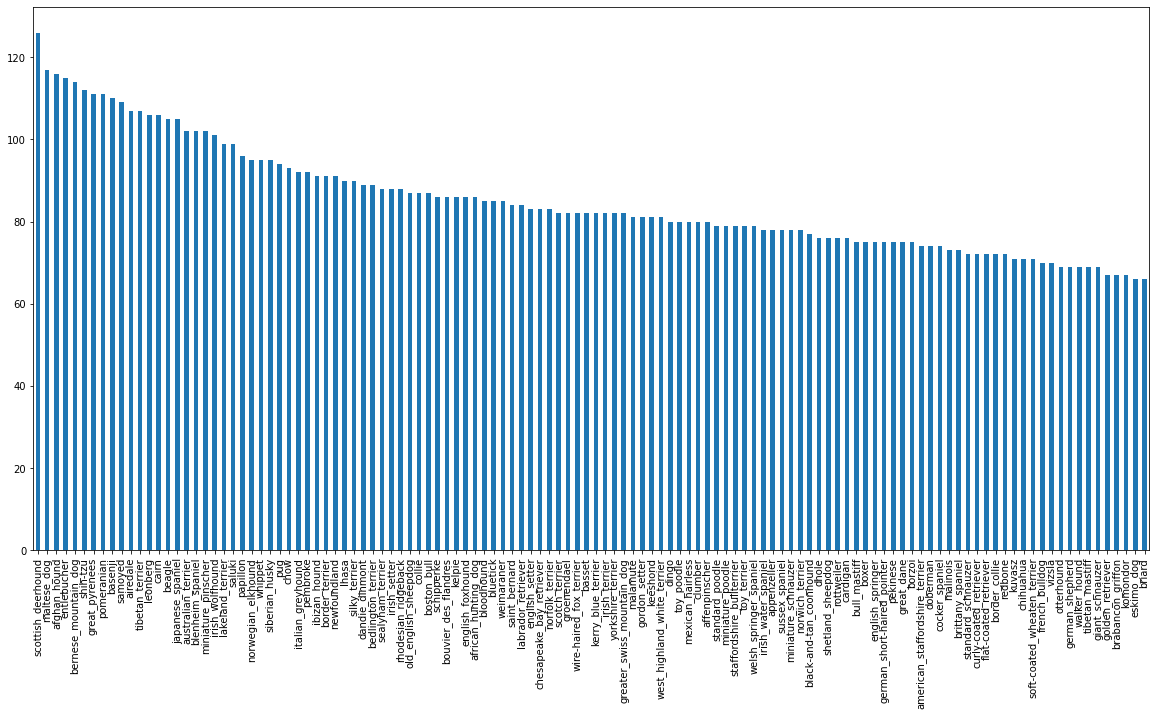

In [5]:
# How many are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [6]:
# Images per class
labels_csv["breed"].value_counts().median()

82.0

### Getting images and their labels
Let's get a list of all our image file path names.

In [7]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog vision/dog-breed-identification/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# check the first 10
filenames[:10]

['drive/MyDrive/Dog vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

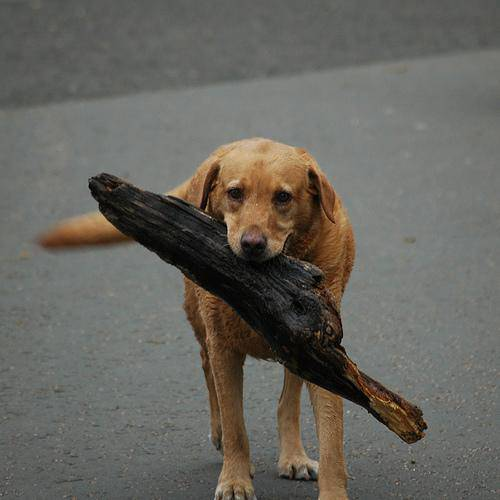

In [8]:
from IPython.display import Image
Image(filenames[4])

In [9]:
labels_csv["breed"][4]

'golden_retriever'

In [10]:
# Check whether no. of filenames matches no. of actual image files
import os
len(os.listdir("drive/MyDrive/Dog vision/dog-breed-identification/train/")) == len(filenames)

True

Since we've now got our training image filepaths in a list,let's prepare our labels.

In [11]:
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
len(labels)

10222

In [13]:
# Check whether no. of labels matches the no. of filenames
len(labels) == len(filenames)

True

In [14]:
# Find the unique label values
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
len(unique_breeds)

120

In [16]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:1]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [17]:
# Eg: Turning boolean array into integers
print(labels[0]) # org label
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set

We' re going to start off with 1000 samples and increase as needed, because practicing on 10k samples would take alot of time.

In [18]:
# Set the number of images to use for experimenting
# In colab parameter is written in capital letters so that it can be adjusted later
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [19]:
# Setup x & y variables
x = filenames
y = boolean_labels
# Lets split data into train and validation sets
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
# Checking data is in correct length
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing Images (Turning Images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to variable, image
3. Turn our jpg into Tensors
4. Normalize image(convert color channel values from 0-255 to 0-1)
5. Resize the image to be a shape of(224,224)
6. Return the modified image

In [20]:
# define image size
IMG_SIZE = 224
# Creating the function
def process_image(image_path):
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg img into numerical tensor with RGB channels
  image = tf.image.decode_jpeg(image, channels = 3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to desired values(244,244)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

# Turning data into batches 
processing 10k+ images in a single run would create a mess for memory
So for that we will take batch size =32, images at a time.
In order to use TensorFlow effectively, we need our data in the form of Tensor tuples (image,label).


In [21]:
# Create a simple funciton to return a tuple (image,label)
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image, label

In [22]:
# Demo of the above
# constant is used to convert in Tensors
(process_image(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [23]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x,y=None, batch_size=BATCH_SIZE, valid_data = False, test_data = False):
  """
   Creates batches of data out of image (x) and label (y) pairs.
   shuffles the data if it's training data but doesn't shuffle if it's 
   validation data. also accepts test data as input(no labels).
  """
  # If data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(batch_size=BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(batch_size=BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepath and label into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping, image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))
    
    # Creates tuples and turns the image path into a preprocessed image
    data = data.map(get_image_label)
    
    # Turn the training data into batches
    data_batch = data.batch(batch_size=BATCH_SIZE)  
  return data_batch                                    

In [24]:
# Create training and validation data batches
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [25]:
# Check the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Building a model using Transfer Learning

Before building a mdoel, these things to be defined:
* The input shape(image shape)to our model
* The output shape(image labels) of our model
* The URL of the model we want to use from TensorFlow hub

In [26]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE,IMG_SIZE,3] # batch,height,width, colour channels

# Setup output shape to the model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
# MobileNet-v2 is a neural network that is 53 layers deep
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

After shaping and setting URL,put them in keras deep learning model.
tf.keras is TensorFlow's high-level API for building and training deep learning models.
Knowing this creating a function which:
* Takes the shapes and model
* Defines the layers in a Keras model in sequential fashion(do this then this)
* compiles the model(says it should be evaluated and improved)
* Builds the model
* Returns the model

In [27]:
# Creates a function which builds a Keras model

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with: ", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1(input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the model
  model.build(INPUT_SHAPE)
  return model

By default keras finds all long arrays to 1280patterns so to limit that dense is used with output shape

1.If working with binary classification:
* Activation: Sigmoid
* Loss: Binary Crossentropy
2.If working with Multi-class classification 
* Activation:softmax
* Loss: Categorical Crossentropy
3.Loss is a measure of how well a model is learning(higher the loss worse the prediction).

4.Optimizer lowers the loss,Adam optimizer is one of the best optimizer
          
5.Metrics judges how well it is peformoning(accuracy).

In [28]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
callbacks are helper functions a model can use during training to do such things as save its progress,check its progress or stop training early if it stops improving.

we'll create two callbacks, one for TensorBoars which helps track our model progress and another for early stopping which prevents our model from training for too long.

### TensorBoard Callback
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to model's fit() function.
3. Visualize model training logs with the %tensorboard magic function.

In [29]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [30]:
# Import date time so the logs get tracked whenever we run an experiment
import datetime
# Create a function to build TensorBoard
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog vision/dog-breed-identification/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early stopping callback 
Early stopping helps model from overfitting by stopping training if a certain evaluation metric stops improving.

In [31]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)